<a href="https://colab.research.google.com/github/Jwalitsolanki/Oil-and-Gas_ML/blob/master/EOR_screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# Creating functions to create random data 

def generate_api(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def generate_visco(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def generate_oilsat(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def generate_perm(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def generate_depth(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def generate_temp(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

In [ ]:
# Random data generation for N2 injection 

api_nitro = generate_api(48, 35, 55, 50)
visco_nitro = generate_visco(0.2, 0.01, 0.4, 50)
oilsat_nitro = generate_oilsat(0.75, 0.4, 0.8, 50)
perm_nitro = generate_perm(2500, 1, 5000, 50)
depth_nitro = generate_depth(8000, 6000, 10000, 50)
temp_nitro = generate_temp(210, 95, 300, 50)
label_nitro = np.full(50, 'Nitrogen')

In [ ]:
# Random data generation for H/C injection 

api_hc = generate_api(41, 5, 50, 50)
visco_hc = generate_visco(0.5, 0.01, 3, 50)
oilsat_hc = generate_oilsat(0.8, 0.3, 0.9, 50)
perm_hc = generate_perm(2500, 1, 5000, 50)
depth_hc = generate_depth(6000, 4000, 10000, 50)
temp_hc = generate_temp(210, 95, 300, 50)
label_hc = np.full(50, 'Hydrocarbon')

In [ ]:
# Random data generation for CO2 injection

api_co2 = generate_api(36, 22, 47, 50)
visco_co2 = generate_visco(1.5, 0.01, 10, 50)
oilsat_co2 = generate_oilsat(0.55, 0.2, 0.8, 50)
perm_co2 = generate_perm(2500, 1, 5000, 50)
depth_co2 = generate_depth(7500, 2500, 10000, 50)
temp_co2 = generate_temp(210, 95, 300, 50)
label_co2 = np.full(50, 'CO2')

In [ ]:

# Random data generation for Immiscible gas injection

api_imm = generate_api(22, 12, 35, 50)
visco_imm = generate_visco(100, 1, 600, 50)
oilsat_imm = generate_oilsat(0.7, 0.35, 0.9, 50)
perm_imm = generate_perm(2500, 1, 5000, 50)
depth_imm = generate_depth(5500, 1800, 9000, 50)
temp_imm = generate_temp(210, 95, 300, 50)
label_imm = np.full(50, 'Immiscible')

In [ ]:
# Random data generation for alkali flooding 

api_alka = generate_api(35, 20, 40, 50)
visco_alka = generate_visco(13, 1, 35, 50)
oilsat_alka = generate_oilsat(0.53, 0.35, 0.8, 50)
perm_alka = generate_perm(450, 10, 800, 50)
depth_alka = generate_depth(3250, 1000, 15000, 50) # inconsistent range in paper
temp_alka = generate_temp(80, 70, 500, 50) # inconsistent range in paper
label_alka = np.full(50, 'ASP')

In [ ]:
# Random data generation for Steam flooding

api_steam = generate_api(13.5, 8, 25, 50)
visco_steam = generate_visco(4700, 1, 200000, 50)
oilsat_steam = generate_oilsat(0.66, 0.4, 0.9, 50)
perm_steam = generate_perm(2540, 200, 5000, 50)
depth_steam = generate_depth(1500, 300, 4500, 50) 
temp_steam = generate_temp(210, 95, 300, 50) 
label_steam = np.full(50, 'Steam')

In [ ]:
# Random data generation for polymer flooding 

api_poly = generate_api(35, 15, 55, 50)
visco_poly = generate_visco(85, 10, 150, 50)
oilsat_poly = generate_oilsat(0.8, 0.5, 0.9, 50)
perm_poly = generate_perm(800, 10, 1700, 50)
depth_poly = generate_depth(4750, 500, 9000, 50) 
temp_poly = generate_temp(140, 75, 500, 50) # inconsistent range in paper
label_poly = np.full(50, 'Polymer')

In [ ]:
api = np.concatenate([api_nitro, api_hc, api_co2, api_imm, api_alka, api_poly, api_steam], axis=0)
visco = np.concatenate([visco_nitro, visco_hc, visco_co2, visco_imm, visco_alka, visco_poly, visco_steam], axis=0)
oilsat = np.concatenate([oilsat_nitro, oilsat_hc, oilsat_co2, oilsat_imm, oilsat_alka, oilsat_poly, oilsat_steam], axis=0)
perm = np.concatenate([perm_nitro, perm_hc, perm_co2, perm_imm, perm_alka, perm_poly, perm_steam], axis=0)
depth = np.concatenate([depth_nitro, depth_hc, depth_co2, depth_imm, depth_alka, depth_poly, depth_steam], axis=0)
temp = np.concatenate([temp_nitro, temp_hc, temp_co2, temp_imm, temp_alka, temp_poly, temp_steam], axis=0)
label = np.concatenate([label_nitro, label_hc, label_co2, label_imm, label_alka, label_poly, label_steam], axis=0)

In [ ]:
df = pd.DataFrame({'Density': api, 'Viscosity': visco, 'Oil Saturation': oilsat, 
                         'Permeability': perm, 'Depth': depth, 'Temperature': temp,
                         'Label': label})
df.head()

,Density,Viscosity,Oil Saturation,Permeability,Depth,Temperature,Label
0,49.341810,0.266445,0.728611,3309.461547,8647.433974,235.045138,Nitrogen
1,37.322823,0.049214,0.453901,510.159845,6407.450113,117.118481,Nitrogen
2,47.835441,0.230957,0.697844,2860.261422,8288.037932,217.785706,Nitrogen
3,49.069784,0.260024,0.723779,3228.186387,8582.407344,231.922336,Nitrogen
4,46.384719,0.202221,0.664180,2496.515848,7997.011792,203.408039,Nitrogen


In [ ]:
df.shape

(350, 7)

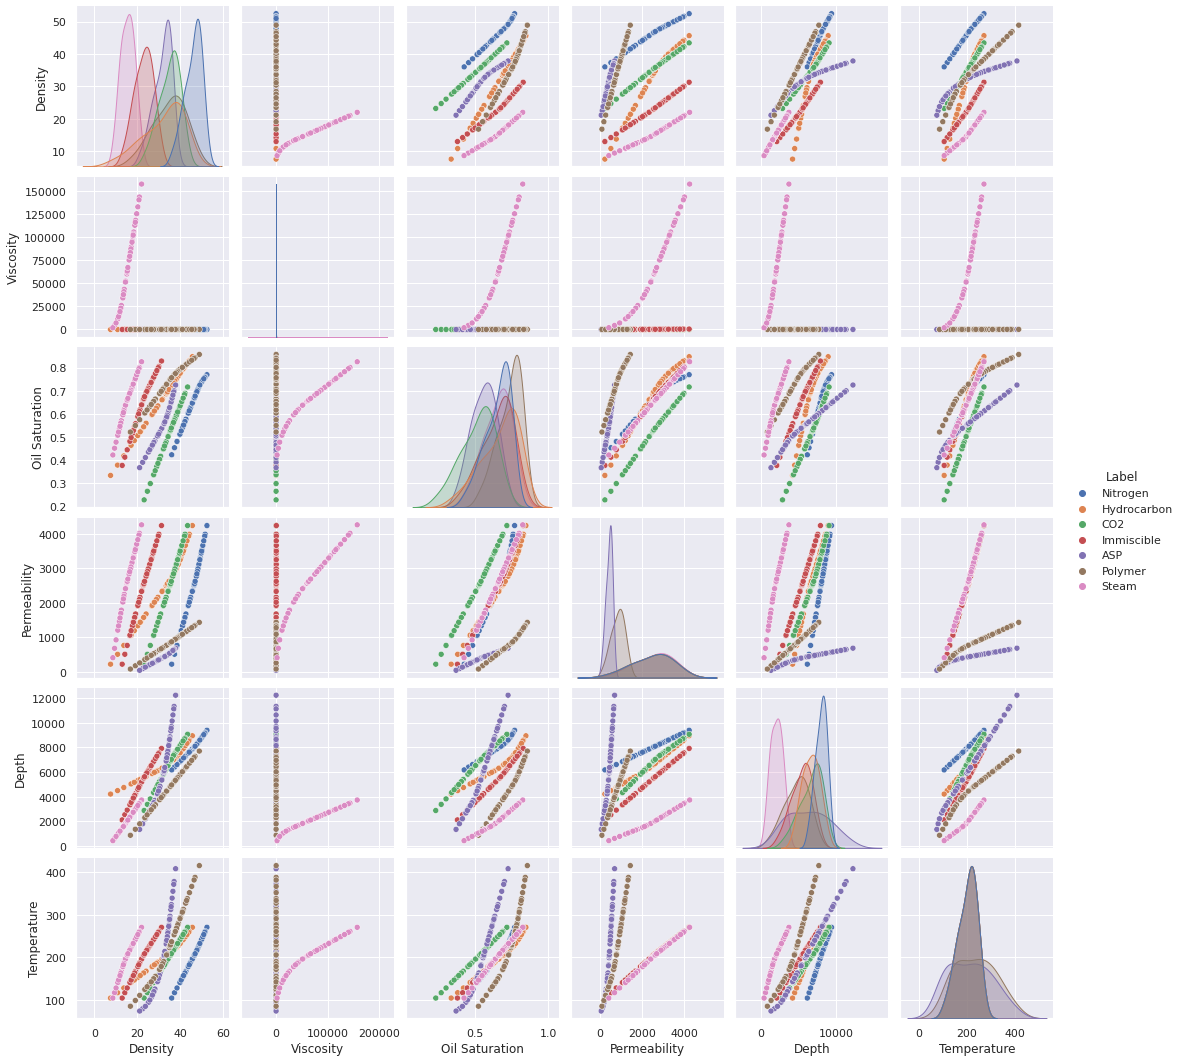

In [ ]:
sns.pairplot(df, hue = 'Label')

In [ ]:
# Pearson Correlation

df_for_corr = df.iloc[:,0:-1]
corr = df_for_corr.corr()
corr

,Density,Viscosity,Oil Saturation,Permeability,Depth,Temperature
Density,1.000000,-0.438977,0.392651,0.209642,0.839576,0.484921
Viscosity,-0.438977,1.000000,0.214720,0.333082,-0.454089,0.098901
Oil Saturation,0.392651,0.214720,1.000000,0.523220,0.350781,0.755268
Permeability,0.209642,0.333082,0.523220,1.000000,0.316902,0.343925
Depth,0.839576,-0.454089,0.350781,0.316902,1.000000,0.594721
Temperature,0.484921,0.098901,0.755268,0.343925,0.594721,1.000000


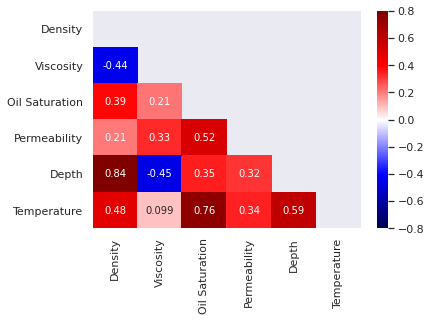

In [ ]:
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

fig = plt.gcf()

# Heatmap with pearson correlation values

sns.heatmap(corr, annot=True, vmin=-0.8, vmax=0.8, cmap='seismic', mask=mask)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encoding the target variable for classification 

label = LabelEncoder()
df['Label'] = label.fit_transform(df['Label'])
df.head()

,Density,Viscosity,Oil Saturation,Permeability,Depth,Temperature,Label
0,49.341810,0.266445,0.728611,3309.461547,8647.433974,235.045138,4
1,37.322823,0.049214,0.453901,510.159845,6407.450113,117.118481,4
2,47.835441,0.230957,0.697844,2860.261422,8288.037932,217.785706,4
3,49.069784,0.260024,0.723779,3228.186387,8582.407344,231.922336,4
4,46.384719,0.202221,0.664180,2496.515848,7997.011792,203.408039,4


In [ ]:
df['Label'].unique()

array([4, 2, 1, 3, 0, 5, 6])

In [ ]:
label.classes_

array(['ASP', 'CO2', 'Hydrocarbon', 'Immiscible', 'Nitrogen', 'Polymer',
       'Steam'], dtype=object)

In [ ]:
X = df.loc[:, df.columns != 'Label']
X.head()

,Density,Viscosity,Oil Saturation,Permeability,Depth,Temperature
0,49.341810,0.266445,0.728611,3309.461547,8647.433974,235.045138
1,37.322823,0.049214,0.453901,510.159845,6407.450113,117.118481
2,47.835441,0.230957,0.697844,2860.261422,8288.037932,217.785706
3,49.069784,0.260024,0.723779,3228.186387,8582.407344,231.922336
4,46.384719,0.202221,0.664180,2496.515848,7997.011792,203.408039


In [ ]:
y = df['Label']
y.head()

0    4
1    4
2    4
3    4
4    4
Name: Label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
from sklearn import tree
clatree = tree.DecisionTreeClassifier(max_depth=4)
clatree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_train_pred = clatree.predict(X_train)
y_test_pred = clatree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test, y_test_pred)

0.8

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[42,  0,  0,  0,  0,  0,  0],
       [ 1, 40,  1,  0,  0,  0,  0],
       [ 0, 34,  3,  0,  0,  0,  0],
       [ 1,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0],
       [ 2,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0, 41]])

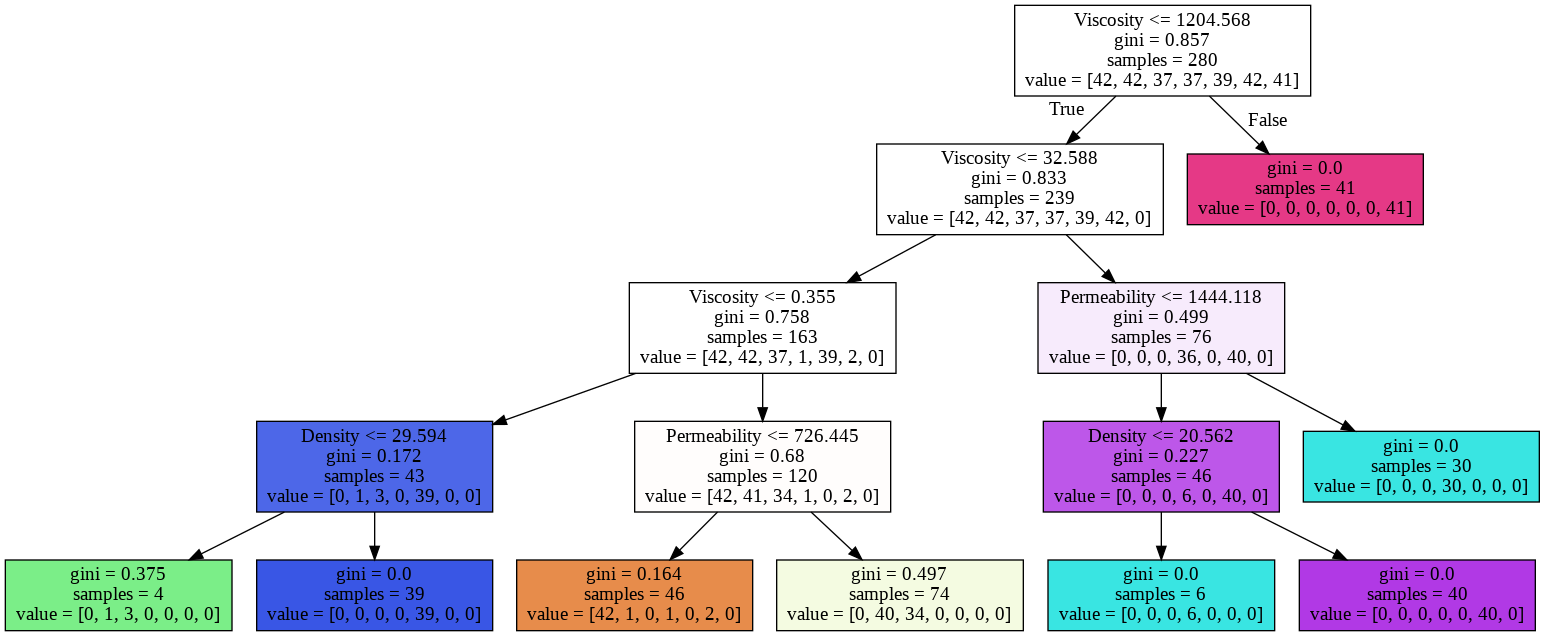

In [ ]:
# Creating decision tree 

dot_data = tree.export_graphviz(clatree, out_file=None, feature_names=X_train.columns, filled=True)
from IPython.display import Image
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Random forest (Ensemble technique for optimizing the decision tree)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
cla_rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
cla_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
accuracy = accuracy_score(y_test, cla_rf.predict(X_test))

In [ ]:
print("Final accuracy : " + str(accuracy*100) + ' %')

Final accuracy : 100.0 %
